In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt					 ram_price.csv
 매수종목2.txt					 ratings_small.txt
 adult.data					 ratings_test.txt
 auto-mpg.csv					 ratings_train.txt
'bmi_500 (1).csv'				 sample1.pdf
 bmi_500.csv					 sample2.pdf
 citibike.csv					 sample_merge.pdf
 매수종목.csv					 sample.xlsx
 database					 score.csv
 data_mine.csv					 seoul_train.csv
 data_population.csv				 stock-data.csv
 data_studentlist_en.csv			'stock price.xlsx'
 day_care_center.csv				'stock valuation.xlsx'
 demo.docx					 test.db.db
 educational_attainment_supplementary_data.csv	 test.txt
 example.docx					 Traffic_Accident_2017.csv
 height_weight.txt				 train.csv
 HelloWorld.xlsx				 user_id_mean.csv
 little-char.png				 wine.csv
 netflix.csv					 world_location.csv
 park.csv					 주가데이터.xlsx
 population_number.csv				 남북한발전전력량.xlsx


## 라이브러리 호출

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import plotly.graph_objects as go
import plotly as py
import folium
import datetime
import os
import matplotlib.colors
from sklearn.preprocessing import MultiLabelBinarizer 
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

- 폰트설정

In [ ]:
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 색상
hex_colors=['#C1E1A7','#F9C1BD','#06ABC6','#622D24','#ABB5CD','#057129','#003366','#DDDDDD','#5B9BD5','#7030A0','#A2AE02','#00B050','#FFFF99','#FF3300','#FF66FF','#800000','#FF9900','#9900CC','#66FFFF','#FFFF00','#00FF00','#3366CC','#FFCCFF','#66FFCC','#B2B2B2','#0D8571','#FF5D5D','#B8ADF9','#F4DB9E','#D88C26','#0000CC','#D490FA']

#### 파일 불러오기

In [ ]:
df = pd.read_csv(drive_path + 'netflix.csv')

## 데이터 처리

#### 결측치 확인하기

In [ ]:
for col in df.columns:
    x = "column: {:>10}\t Percent of NaN value: {:.2f}%".format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(x)

column:    show_id	 Percent of NaN value: 0.00%
column:       type	 Percent of NaN value: 0.00%
column:      title	 Percent of NaN value: 0.00%
column:   director	 Percent of NaN value: 30.68%
column:       cast	 Percent of NaN value: 9.22%
column:    country	 Percent of NaN value: 6.51%
column: date_added	 Percent of NaN value: 0.13%
column: release_year	 Percent of NaN value: 0.00%
column:     rating	 Percent of NaN value: 0.09%
column:   duration	 Percent of NaN value: 0.00%
column:  listed_in	 Percent of NaN value: 0.00%
column: description	 Percent of NaN value: 0.00%


#### 그래프로 결측치 확인하기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


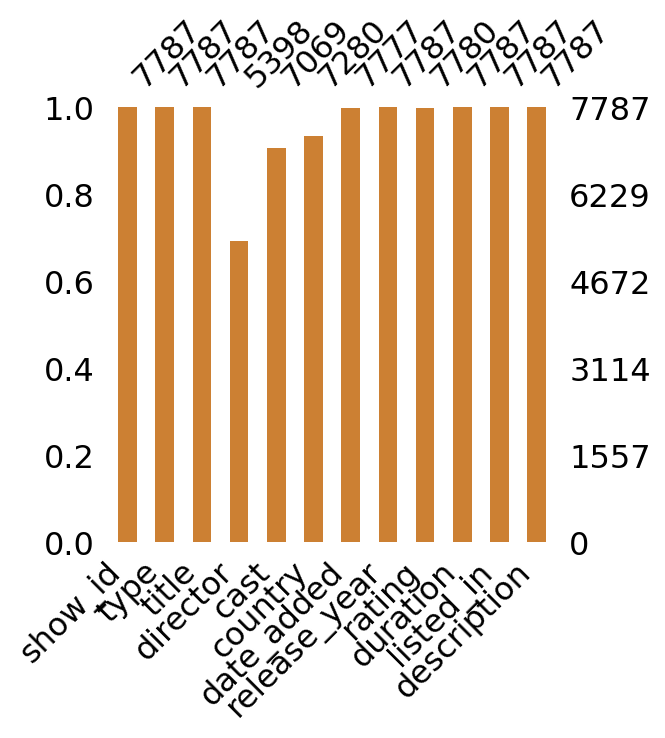

In [ ]:
msno.bar(df.iloc[:,:], figsize=(4,4), color=(0.8,0.5,0.2))

#### 결측치 데이터 제거

- 나머지 결측치 있는 데이터 전부 제거

In [ ]:
# 불필요한 부분 제거
df.drop(['show_id','cast','director', 'description'], axis = 1, inplace = True)

In [ ]:
# 결측치가 있는 행을 전부 제거
df.dropna(axis=0,inplace=True)

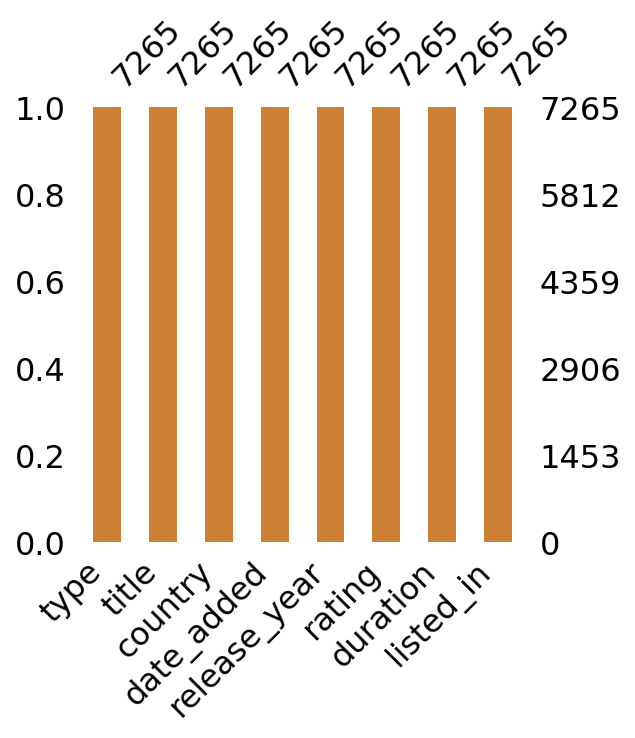

In [ ]:
# 최종 결측치 그래프로 확인
msno.bar(df.iloc[:,:], figsize=(4,4), color=(0.8,0.5,0.2))

#### 날짜 데이터를 요일 데이터로 변경시켜서 열 추가


*   날짜를 연,월,일로 변환시켜서 열에 추가하기




In [ ]:
# 날짜를 변환 시킨 후 연월일로 분리
df['date_added'] = pd.to_datetime(df['date_added'])
df['year']= df['date_added'].dt.year
df['month']= df['date_added'].dt.month
df['day']= df['date_added'].dt.day

In [ ]:
# 연월일을 가지고 요일을 계산하여 요일별 열을 만들어준다.
def get_today_days(year,month,day):
    days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] # 요일별 리스트
    return days[datetime.date(year,month,day).weekday()]

day_week = [get_today_days(df['year'].iloc[i], df['month'].iloc[i], df['day'].iloc[i]) for i in range(len(df))]

df['day_week'] = day_week

#### 등급별 카테고리화

In [ ]:
# 시청가능한 최저 나이로 rating str변환
rating_for_age = { 
    'TV-MA' : '18',  # 17세 미만의 어린이 혹은 청소년한테 부적절한 프로그램
    'TV-14' : '15',   # 14세 미만의 어린이 혹은 청소년이 시청하려면 보호자 지도가 권장되는 프로그램
    'TV-PG' : '12',   # 어린이가 시청하려면 보호자 지도가 권장되는 프로그램
    'R': '18',       # 일반적 성인 영화. 17세 미만의 경우 부모의 동반 필수
    'PG-13' : '14',   # 전체 관람가지만, 부모의 주의가 요구되며 13세 미만에게는 적절하지 않음
    'TV-Y' : '1',      # 영유아를 위한 프로그램
    'TV-Y7' : '7',   # 7세 이상 어린이를 위한 프로그램
    'PG' : '12',     # 전체 관람가지만, 폭력성이 존재하므로 어린이의 경우 보호자의 지도가 요구
    'TV-G' : '1',       # 모든 연령이 시청할 수 있는 프로그램. 다만 어린이를 대상으로 하지는 않았다
    'NR' : '19',           # NR은 Not Rated로 등급을 받지 않은 경우
    'G' : '1',         # 일반용
    'TV-Y7-FV' : '7',  # 7세 이상의 어린이를 위한 프로그램. 매우 경미한 가상의 폭력 묘사가 있음.
    'UR' : '19',     # 매겨진 등급을 거부
    'NC-17' : '19'   # 수위가 매우 높은 성인 영화. 18세 미만 관람불가
}
df['rating_age'] = df['rating'].replace(rating_for_age)

# 1 / 7 / 12 / 14,15 / 18,19
# 카테고리화
ages = df['rating_age'].astype(int)
bins = [0, 3, 11, 17, 19] # 4개 영역으로 카테고리화
age_labels = ['All', 'Children' ,'Teens', 'Adults']
rating_cat = pd.cut(ages, bins, labels = age_labels)
rating_cat
df['rating_age_cat'] = rating_cat


####   duration을 분리시키기 위해 2가지 타입별 분류






In [ ]:
# 데이터를 복사해 pandas 오류 방지
movie = df[df['type'] == 'Movie']
movie = movie.copy()  
tvshow = df[df['type'] == 'TV Show']
tvshow = tvshow.copy()

## 그래프 분석

#### 어떤 나라가 넷플릭스 콘텐츠 생산을 가장 많이 했을까? (나라별 컨텐츠 수 비교)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


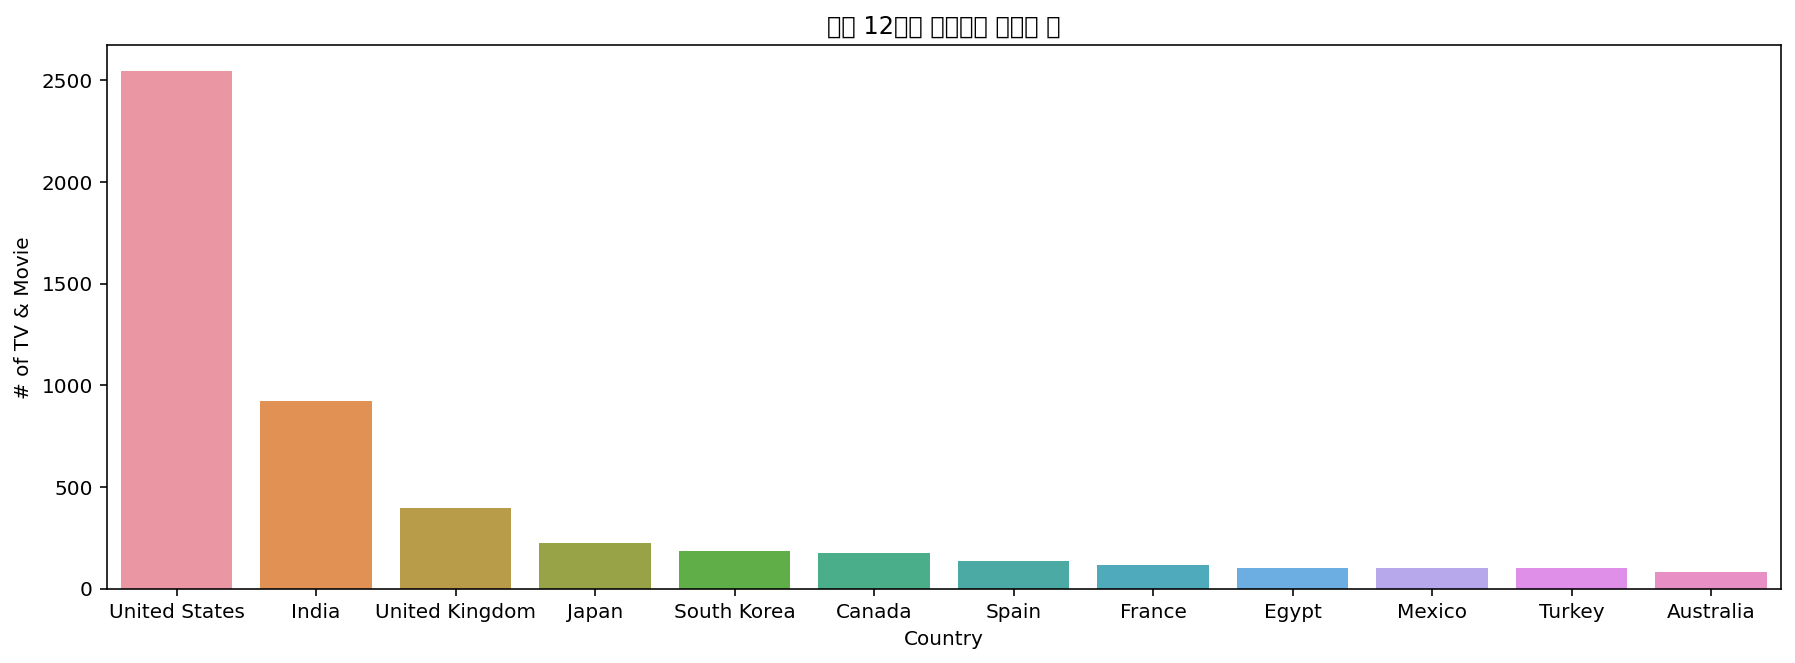

In [ ]:
# 나라와 타입별로 데이터프레임 생성
count_type = df.groupby(['country']).count()
most_country = count_type['type'].to_frame().reset_index().sort_values(by='type', ascending=False)[:12] # 상위12개국

# Seaborn이용하여 시각화
plt.figure(figsize=(15,5))
plt.title('상위 12개국 넷플릭스 콘텐츠 수')
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='country', y='type', data=most_country)
plt.ylabel('# of TV & Movie')
plt.xlabel('Country')
plt.show()

#### 유형별 컨텐츠 비교

##### 전체 컨텐츠 타입(유형) 분석

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


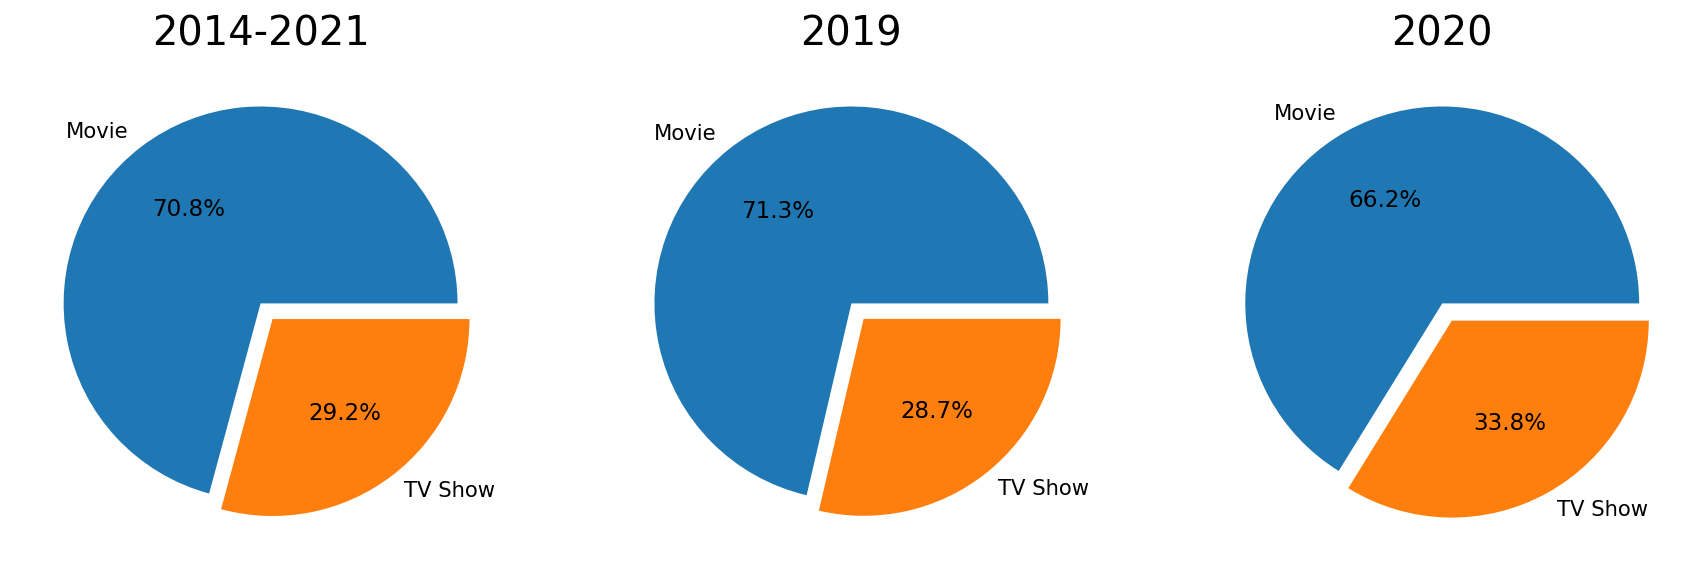

In [ ]:
# 14~21년도 컨텐츠 분석
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
type_labels = ['Movie',"TV Show"]
type_counts = df['type'].value_counts()
plt.pie(type_counts,labels=type_labels,explode=[0,0.1], autopct='%1.1f%%')
plt.title('2014-2021',fontsize = 20)

# 2. 2019년 type 분류 
df_type_2019 = df[["type","year"]][df['year']==2019].value_counts()
plt.subplot(1,3,2)
plt.pie(df_type_2019, labels=type_labels, explode=[0,0.1], autopct='%1.1f%%')
plt.title('2019',fontsize = 20)

# 3. 2020년 type 분류 
df_type_2020 = df[["type","year"]][df['year']==2020].value_counts()
plt.subplot(1,3,3)
plt.pie(df_type_2020, labels=type_labels, explode=[0,0.1], autopct='%1.1f%%')
plt.title('2020',fontsize = 20)

plt.show()

##### 14년 ~ 21년 연도별 컨텐츠 타입 분석

In [ ]:
movie_per_year = [] # 연도별 영화 콘텐츠 수
tv_show_per_year = [] # 연도별 TV프로그램 콘텐츠 수

for i in range(2014,2021):
    m = df.loc[(df['type']=='Movie') & (df['year']==i)]
    s = df.loc[(df['type']=='TV Show') & (df['year']==i)]
    movie_per_year.append(len(m))
    tv_show_per_year.append(len(s))

trace1 = go.Scatter(x = [i for i in range(2014,2021)],y = movie_per_year, mode = 'lines+markers',name= 'Movie',)
trace2 = go.Scatter(x = [i for i in range(2014,2021)],y = tv_show_per_year, mode = 'lines+markers',name= 'TV Shows')

data=[trace1,trace2]

layout = go.Layout(title = "Contents per year", legend = dict(y= 1 , orientation="v"))

fig = go.Figure(data,layout=layout)
fig.show(renderer="colab")

#### 연도별 전세계 넷플릭스 컨텐츠 생산 수

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


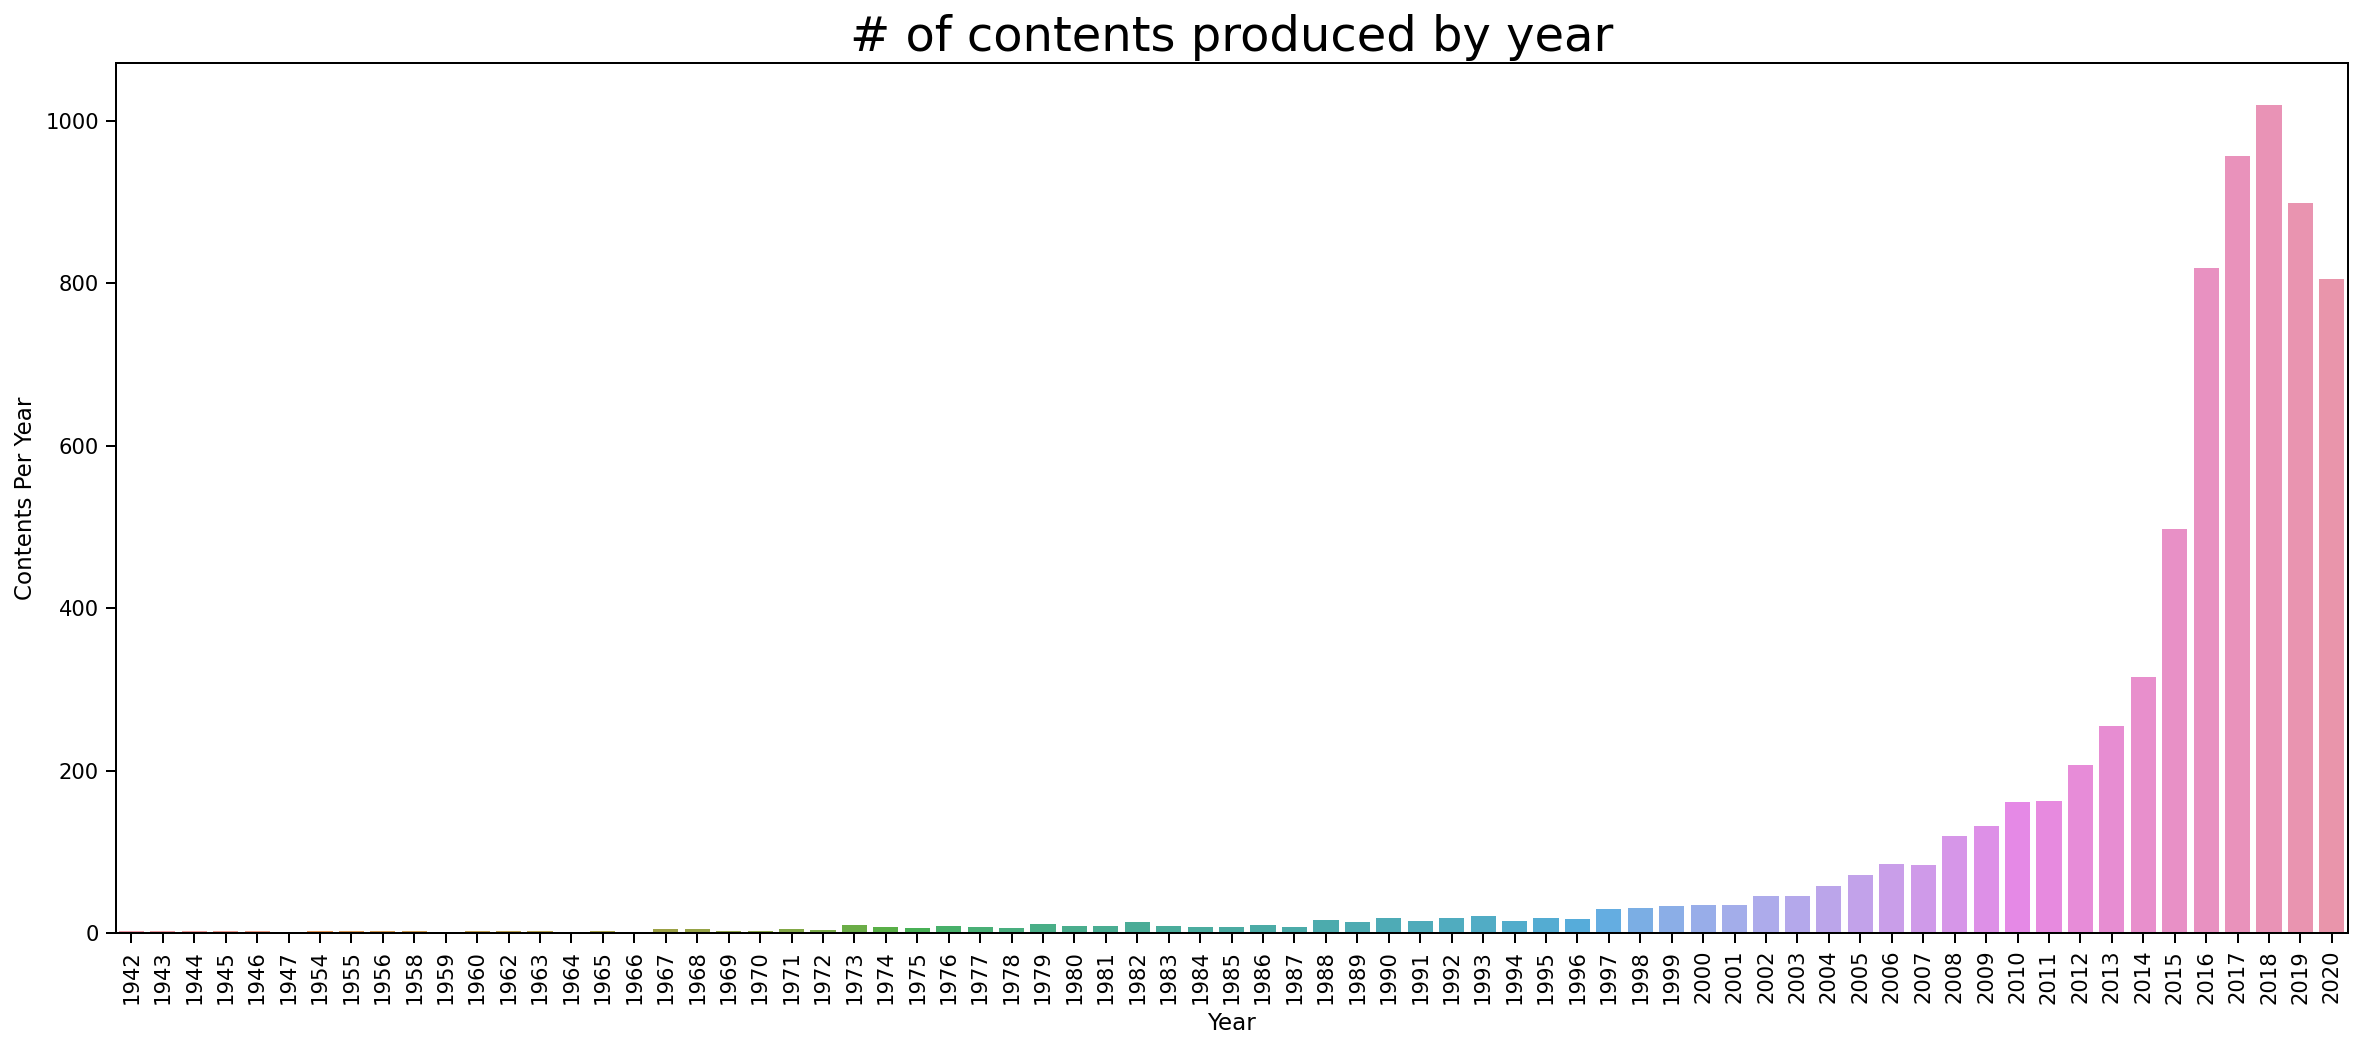

In [ ]:
contents_per_year=df['release_year'].value_counts().reset_index()
contents_per_year.columns.values[0]='Year'
contents_per_year.columns.values[1]='Count'

plt.figure(figsize=[20,8])
contents_per_year2 = contents_per_year[contents_per_year['Year']<2021].copy()
contents_per_year2.sort_values(by='Year',inplace=True)
sns.barplot(data=contents_per_year2,x='Year',y='Count')
plt.title('# of contents produced by year',fontsize=24)
plt.xlabel('Year')
plt.ylabel('Contents Per Year')
plt.xticks(rotation=90)
plt.show()

#### 등급별 비율 확인
- 2019년 2020년 연령비율 간의 상관관계 비교
- 2020년에 코로나19 영향으로 인해 키즈,패밀리 등급물이 더 많아짐.

###### 넷플릭스 출범이후 연령별 데이터 비교

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


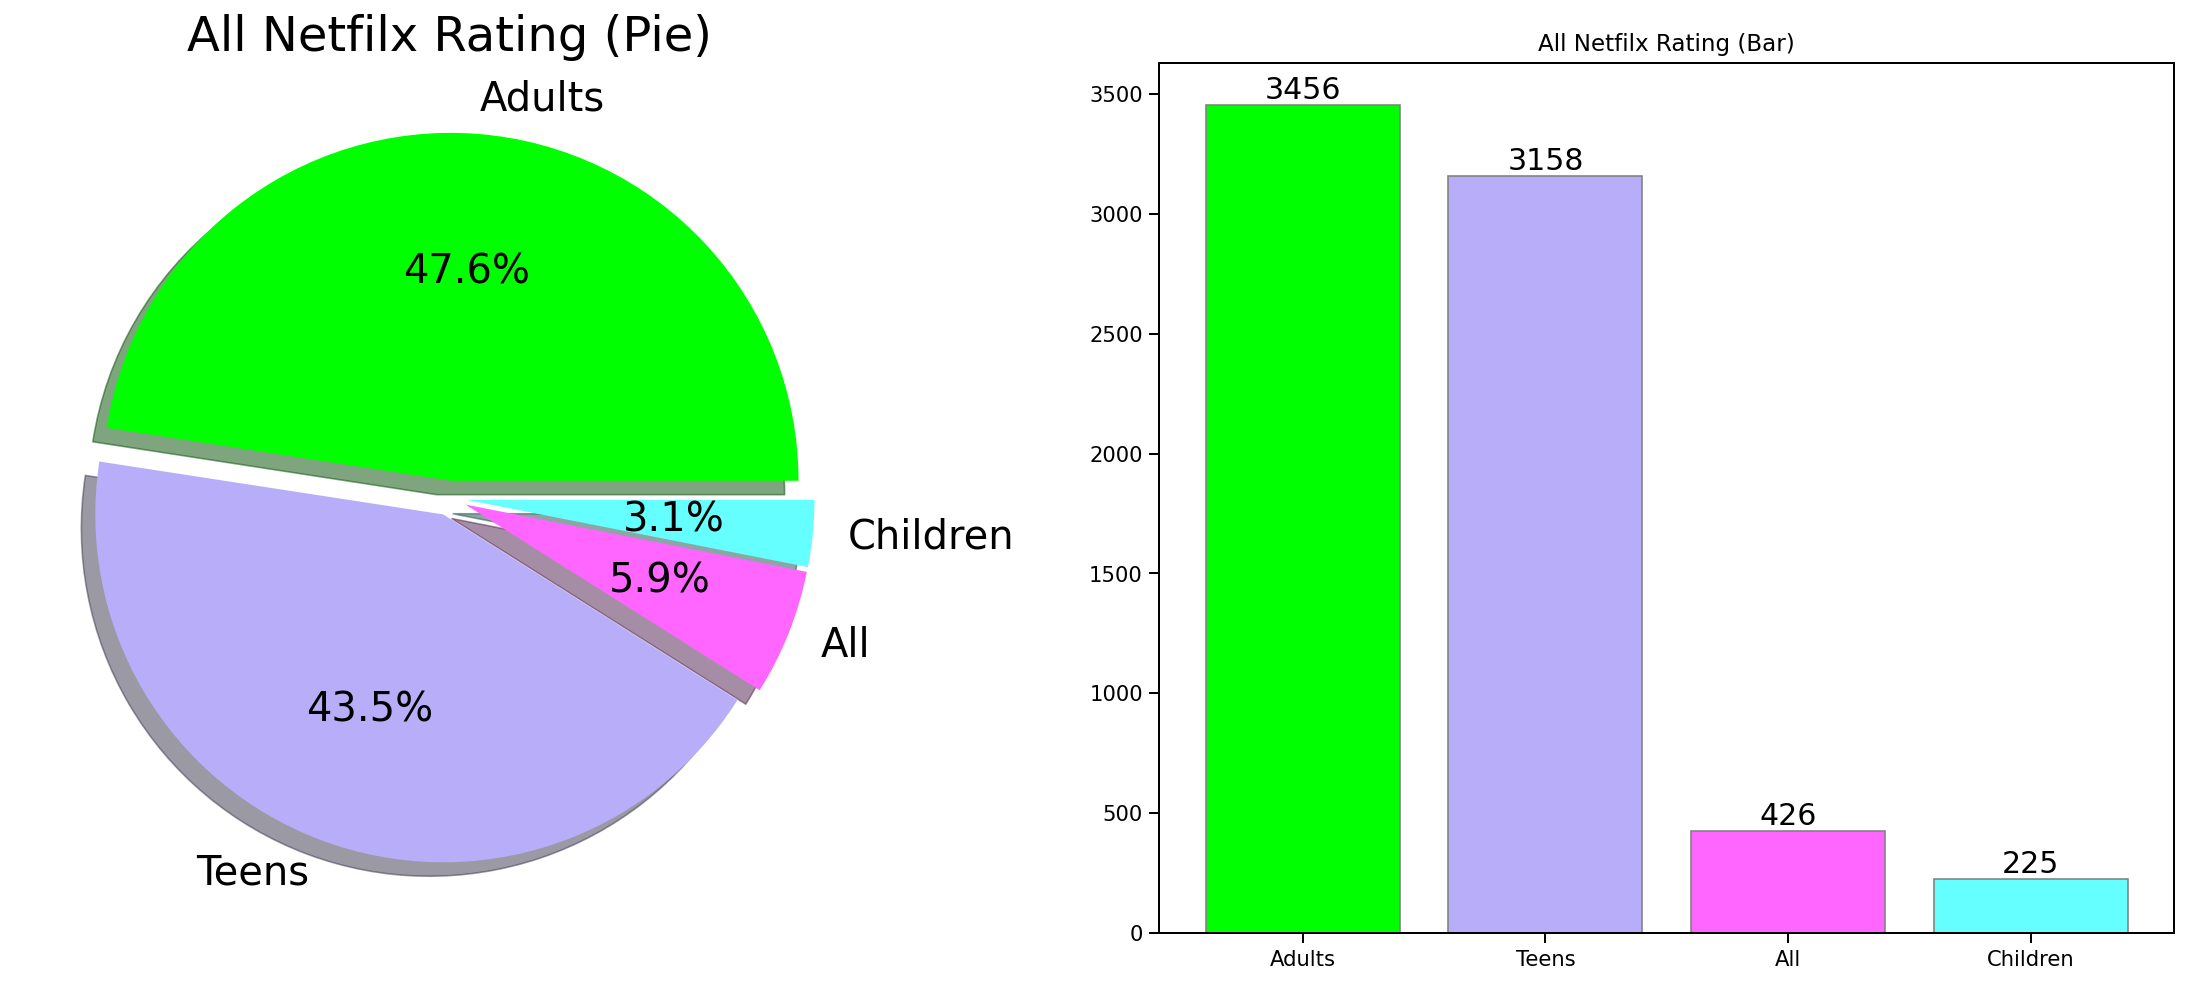

In [ ]:
np_rating = rating_cat.value_counts()
labels = ['#00FF00','#B8ADF9','#FF66FF','#66FFFF'] 
np_rating_index = np_rating.index
np_rating_value = np_rating.values

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title('All Netfilx Rating (Pie)', fontsize=24)
plt.pie(np_rating, labels=np_rating.index, autopct='%1.1f%%',colors=labels, shadow=True,textprops={'fontsize':20},explode=[0.05,0.05,0.05,0.05])

plt.subplot(1, 2, 2)
plt.title('All Netfilx Rating (Bar)')
plt.bar(np_rating_index, np_rating_value, color=labels, edgecolor="gray")
for i, v in enumerate(np_rating_index):
    plt.text(v, np_rating_value[i], np_rating_value[i],
             fontsize=15,
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()

#### 요일별 넷플릭스 출시 분석
- 넷플릭스는 주로 금요일에 출시를 하고 휴일에는 출시를 잘하지 않는다.
- 주말에 사람들의 관심을 끌 수 있도록 금요일에 출시량이 2배가 넘음

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


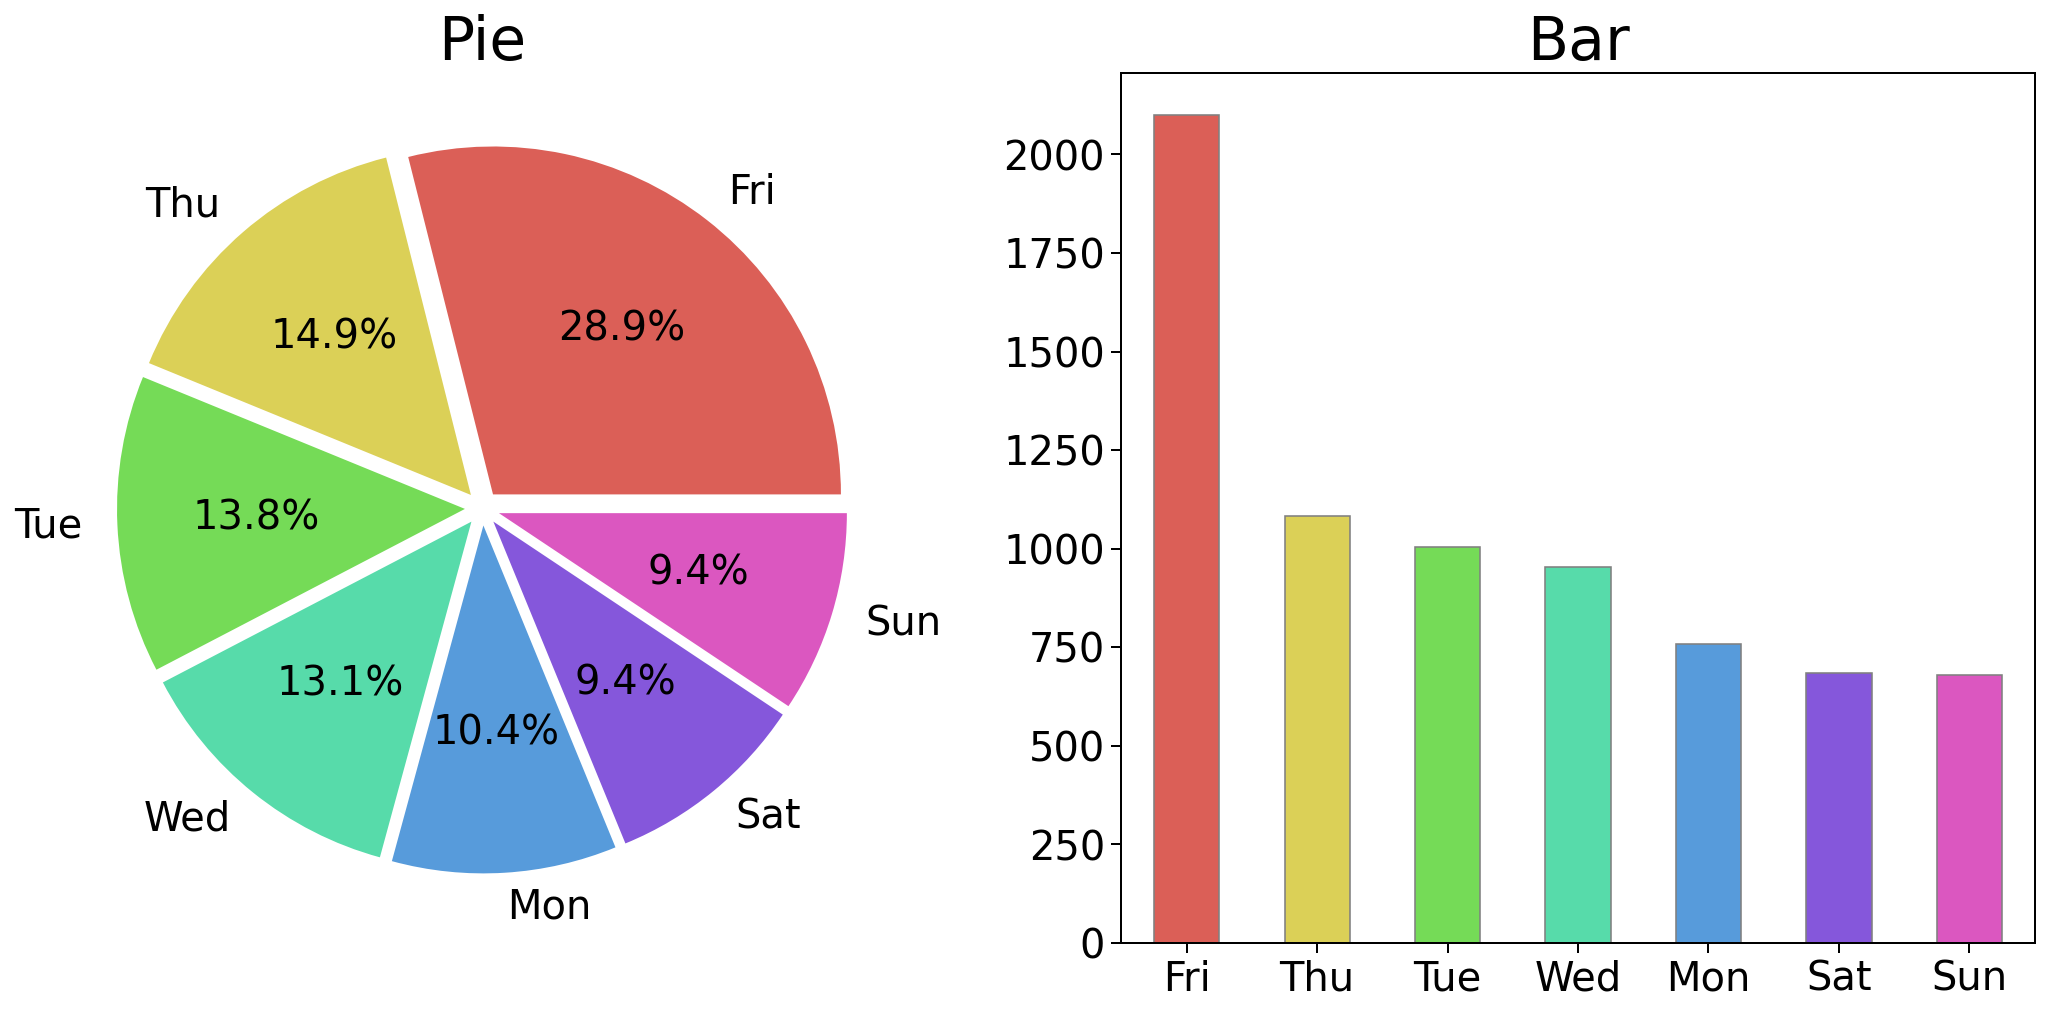

In [ ]:
labels = ['Red','Orange','Yello','Green','Blue','navy','violet'] ## 라벨
colors = sns.color_palette('hls',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['day_week'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%' ,ax=ax[0], fontsize=20, colors=colors)
ax[0].set_title('Pie',fontsize=30)
ax[0].set_ylabel('')

df['day_week'].value_counts().plot.bar(ax=ax[1], rot=0, fontsize=20, color=colors, edgecolor='gray')

ax[1].set_title('Bar',fontsize=30)
plt.show()

- 월별과 요일을 크로스 시켜 언제 출시를 많이하는지 확인하기

In [ ]:
pd.crosstab(movie['month'],movie['day_week'],margins=True).style.background_gradient(cmap='summer_r')

day_week,Fri,Mon,Sat,Sun,Thu,Tue,Wed,All
month,,,,,,,,
1,126,86,25,38,39,85,136,535
2,103,20,26,24,50,32,66,321
3,162,18,22,26,134,46,45,453
4,94,53,55,49,32,43,80,406
5,85,55,22,16,54,72,44,348
6,92,39,55,18,85,40,34,363
7,80,64,38,96,40,32,46,396
8,71,35,41,18,116,55,56,392
9,111,29,51,46,46,61,40,384


In [ ]:
pd.crosstab(tvshow['month'],tvshow['day_week'],margins=False).style.background_gradient(cmap=plt.cm.RdBu)

day_week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
month,,,,,,,
1,78,13,7,11,19,19,29
2,57,8,16,7,16,10,19
3,76,5,11,12,19,21,28
4,47,19,20,14,19,16,25
5,61,20,14,7,14,17,9
6,59,17,26,4,16,8,12
7,66,20,29,8,18,11,26
8,65,27,16,3,29,28,15
9,61,7,13,26,26,26,21


#### 장르별 분석

###### 전세계 장르별로 등록된 컨텐츠 분석

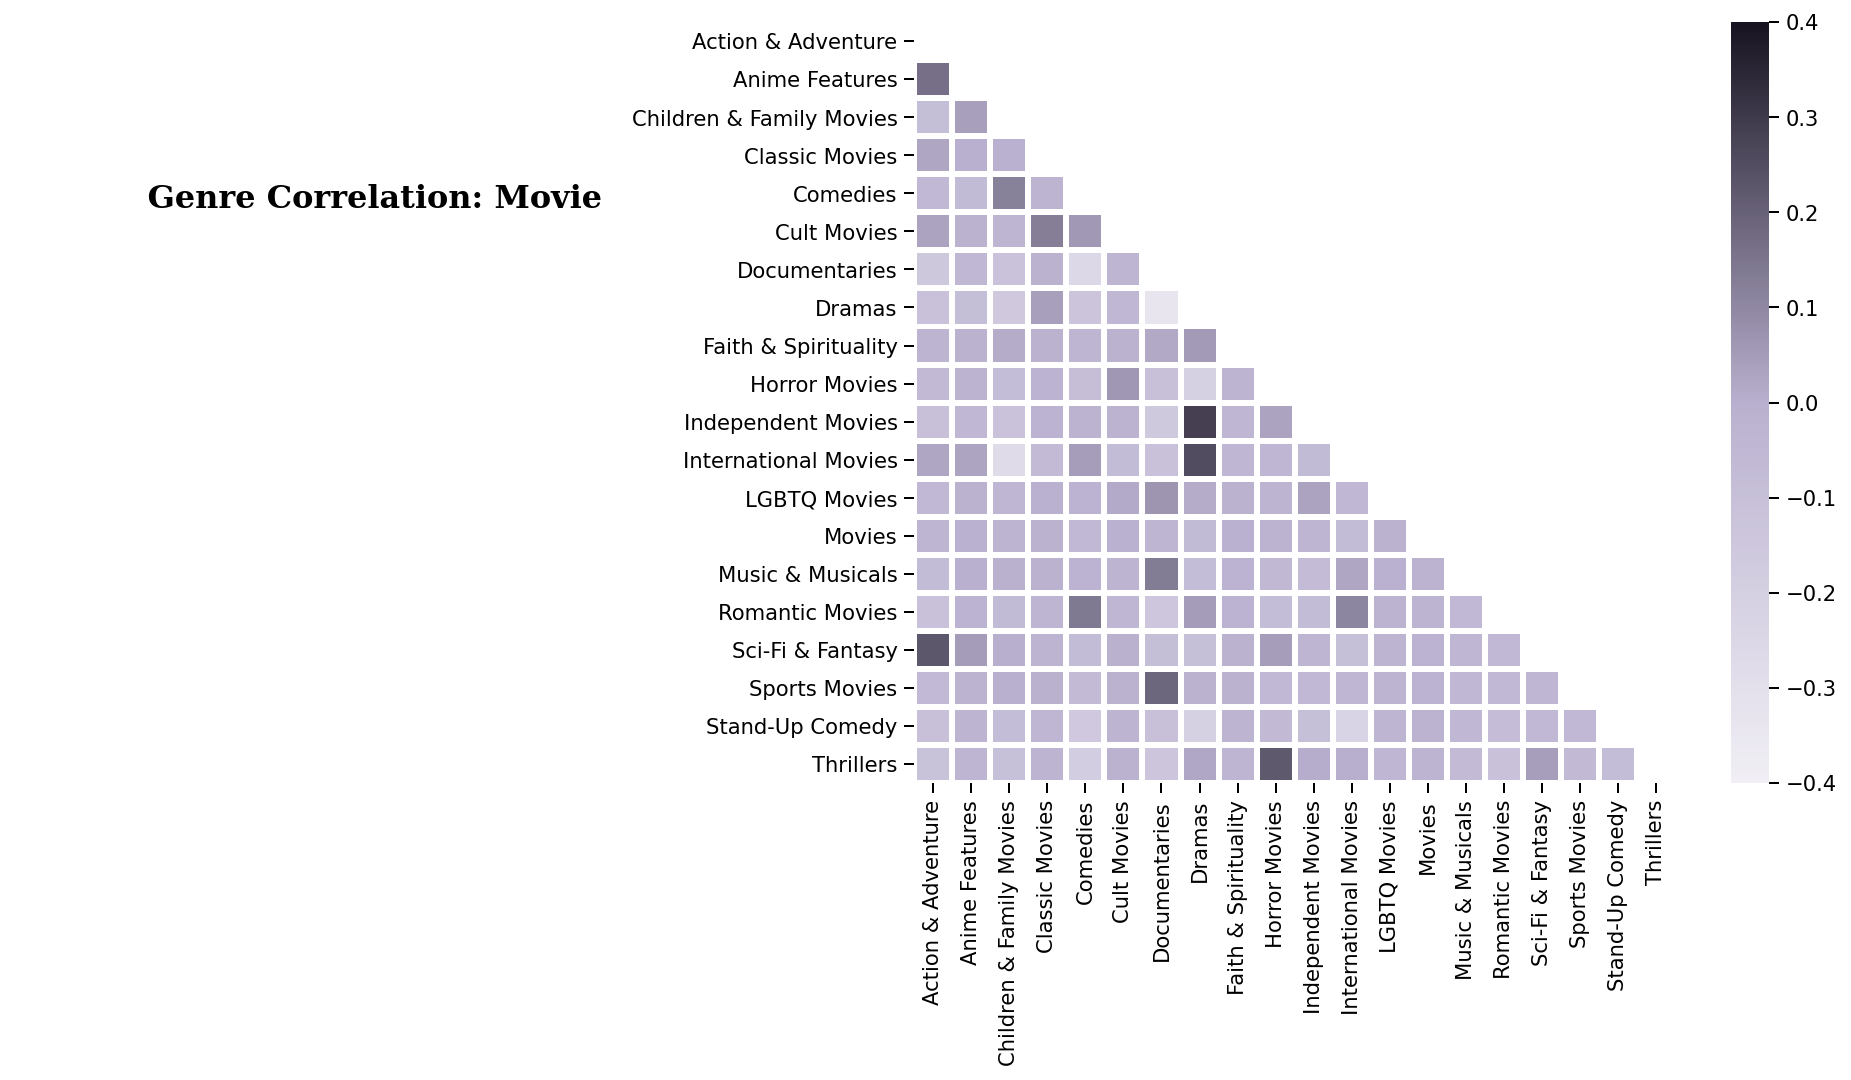

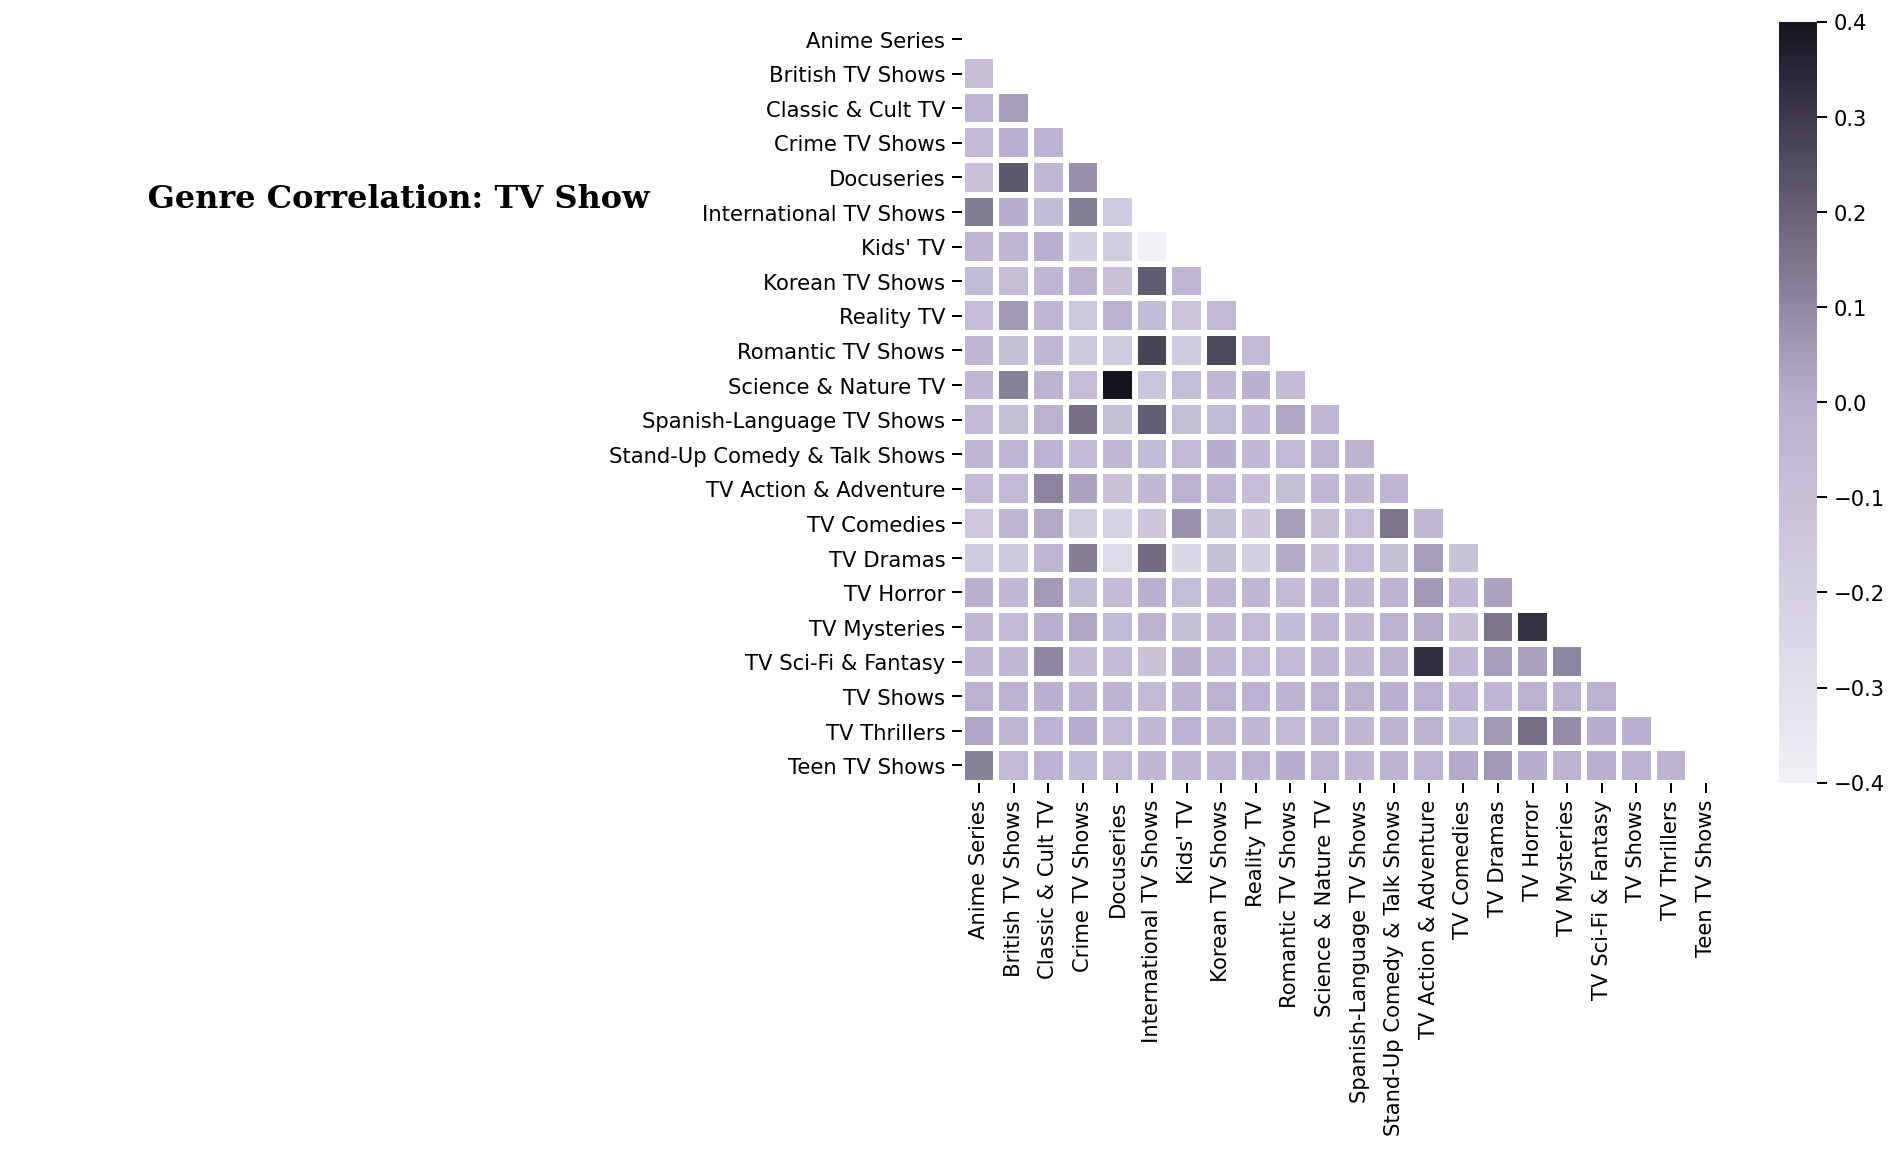

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f1eff5', '#b9b0cf', '#171320'])

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(', ',',').split(',')) # listed_in 여러개 항목이 들어있는 부분들을 분리시킴
    # Types = []
    # for i in df['genre']: Types += i
    # Types = set(Types)
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    fig, ax = plt.subplots(figsize=(10, 7))

    if 'Movie' in title:
      fig.text(0,.660, '''
            Genre Correlation: Movie
            ''',fontfamily='serif',fontweight='bold',fontsize=16,ha='right')
    else :
        fig.text(0,.660, '''
            Genre Correlation: TV Show
            ''',fontfamily='serif',fontweight='bold',fontsize=16,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, vmin=-.4, center=0, square=True, linewidths=2.5)
    plt.show()


genre_heatmap(movie, 'Movie')
plt.show()

genre_heatmap(tvshow, 'TV Show')
plt.show()

###### 장르별 상위 30개 항목 연도별로 한눈에 보기

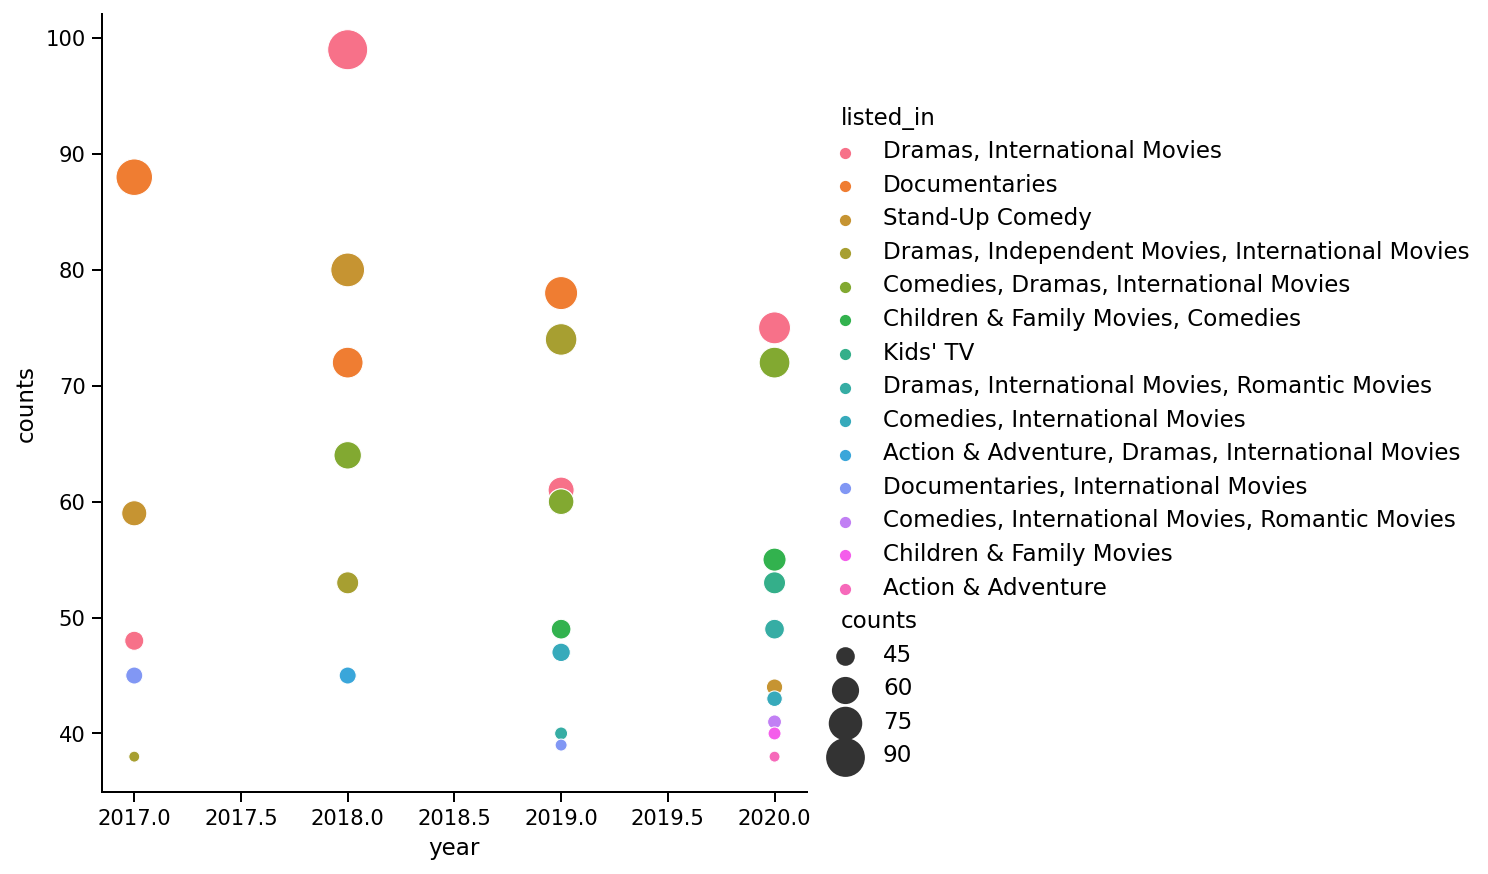

In [ ]:
list_in_entire = df[['listed_in','year']].value_counts().head(30) # 상위30개

df_list=pd.DataFrame(list_in_entire) # 데이터 프레임 변환
df_list = df_list.reset_index() # 인덱스 새로 설정
df_list.columns = ['listed_in',"year",'counts'] 
df_list["year"] = df_list["year"].astype(int) # 연도 int로 변환
sns.relplot(x="year", y="counts", hue="listed_in", size="counts",
             sizes=(30, 400),
               height=6, data=df_list)

###### 장르별 상위 10개 시각화 - 전체 데이터

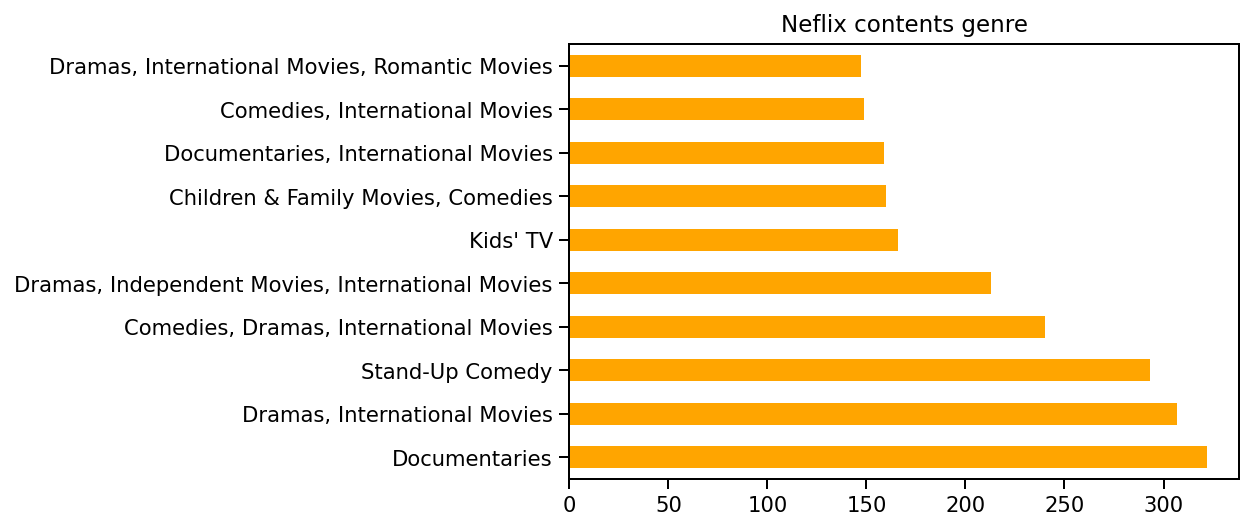

In [ ]:
list_in_entire=df['listed_in'].value_counts().head(10) # listed_in 상위 10개 항목 추출
list_in_entire.plot.barh(color= 'orange') # 가로 막대그래프로 시각화_in 상위 10개 항목 추출
plt.title("Neflix contents genre")
plt.show()

## 코로나전(2019년)과 코로나 후(2020년)의 컨텐츠 비교

#### 2019년과 2020년의 연령별 데이터 비교

- 코로나 전과 후의 rating별 컨텐츠 비교

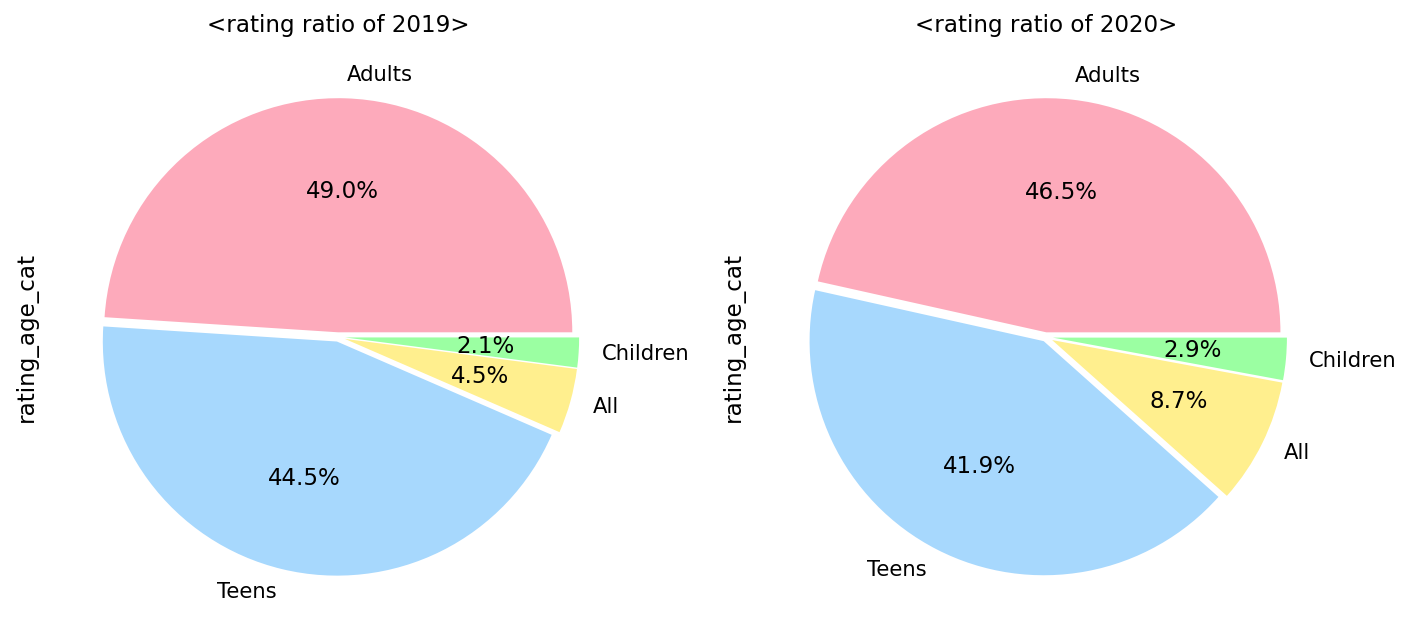

In [ ]:
plt.figure(figsize=(10,14))
# 2019년 rating 비율 ( pie plot )
df_rating_2019 = df['rating_age_cat'][df['year']==2019].value_counts()

plt.subplot(1,2,1)
plt.title('<rating ratio of 2019>')
df_rating_2019.plot(kind = 'pie', explode=[0.02,0.02, 0.03, 0.03], autopct='%1.1f%%', colors=['#fdaabb', '#a7d8fd', '#ffef8e', '#9bffa2'])

# 2020년 rating 비율 ( pie plot )
df_rating_2019 = df['rating_age_cat'][df['year']==2020].value_counts()

plt.subplot(1,2,2)
plt.title('<rating ratio of 2020>')
df_rating_2019.plot(kind = 'pie', explode=[0.02,0.02, 0.03, 0.03], autopct='%1.1f%%', colors=['#fdaabb', '#a7d8fd', '#ffef8e', '#9bffa2'])

plt.tight_layout()  # 그래프 사이 간격 자동 조정
plt.show()

 

#####연령 데이터 비교 (선, 막대)



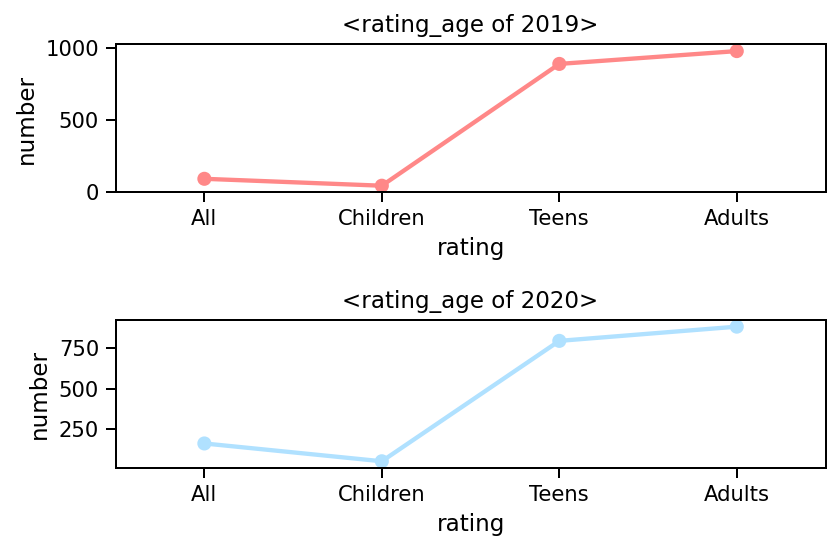

<Figure size 2880x720 with 0 Axes>

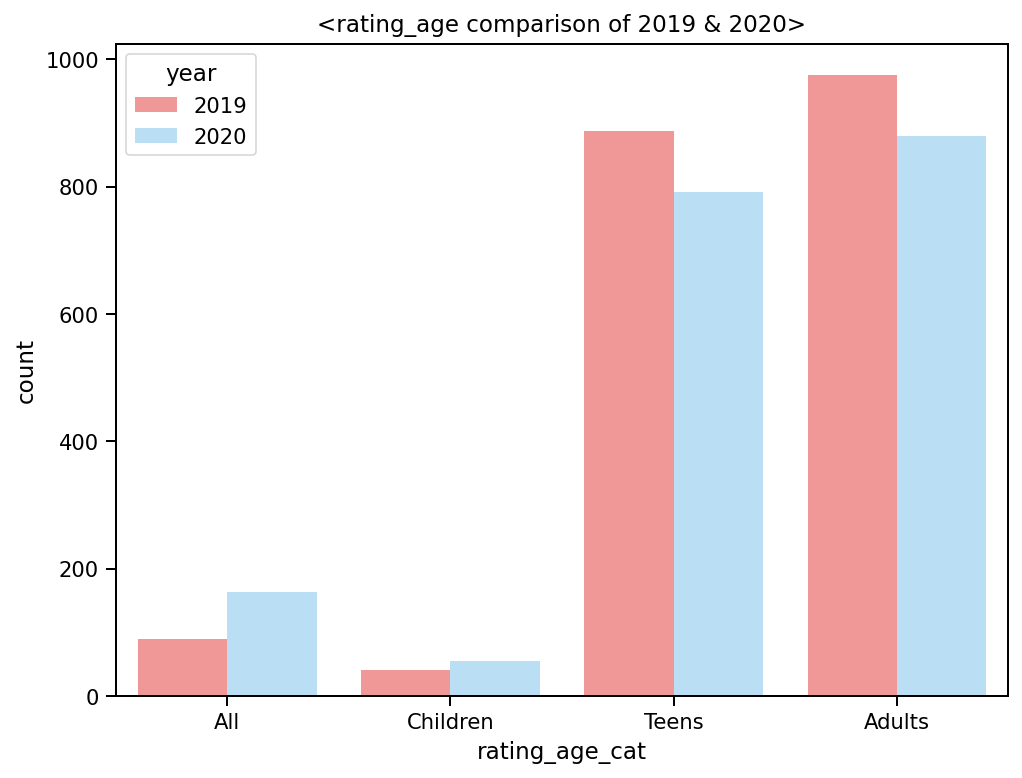

In [ ]:
# 2019년 rating 비율  --> 선 그래프
df_rating_2019 = df['rating_age_cat'][df['year']==2019].value_counts()
df_rating_2019

x2019 = df_rating_2019.index
y2019 = df_rating_2019.values

plt.subplot(2,1,1)
plt.xlabel('rating')
plt.ylabel('number')
plt.title('<rating_age of 2019>')
sns.pointplot(x=x2019, y=y2019, linestyles  = '-', color='#ff8888') # 분홍색

# 2019년 rating 비율
df_rating_2020 = df['rating_age_cat'][df['year']==2020].value_counts()
df_rating_2020

x2020 = df_rating_2020.index
y2020 = df_rating_2020.values

plt.subplot(2,1,2)
plt.xlabel('rating')
plt.ylabel('number')
plt.title('<rating_age of 2020>')
sns.pointplot(x=x2020, y=y2020, linestyles  = '-', color='#b0e1ff') # 하늘색

plt.tight_layout()  # 그래프 사이 간격 자동 조정
plt.figure(figsize=(40,10))
plt.show()

df_test = df[(df['year'] == 2019) | (df['year'] == 2020)]
plt.figure(figsize=(8,6))
plt.title('<rating_age comparison of 2019 & 2020>')
sns.countplot('rating_age_cat', hue='year',data=df_test, palette = ['#ff8888','#b0e1ff'])

#### 코로나 대유행시(2020년) 전세계 넷플릭스 월별 새로 등록된 컨텐츠 수

- 2월에 컨텐츠 등록이 확연히 감소하였다.
- 코로나 대유행 회복에 따라 12월에 가장 많은 컨텐츠를 등록하였다.

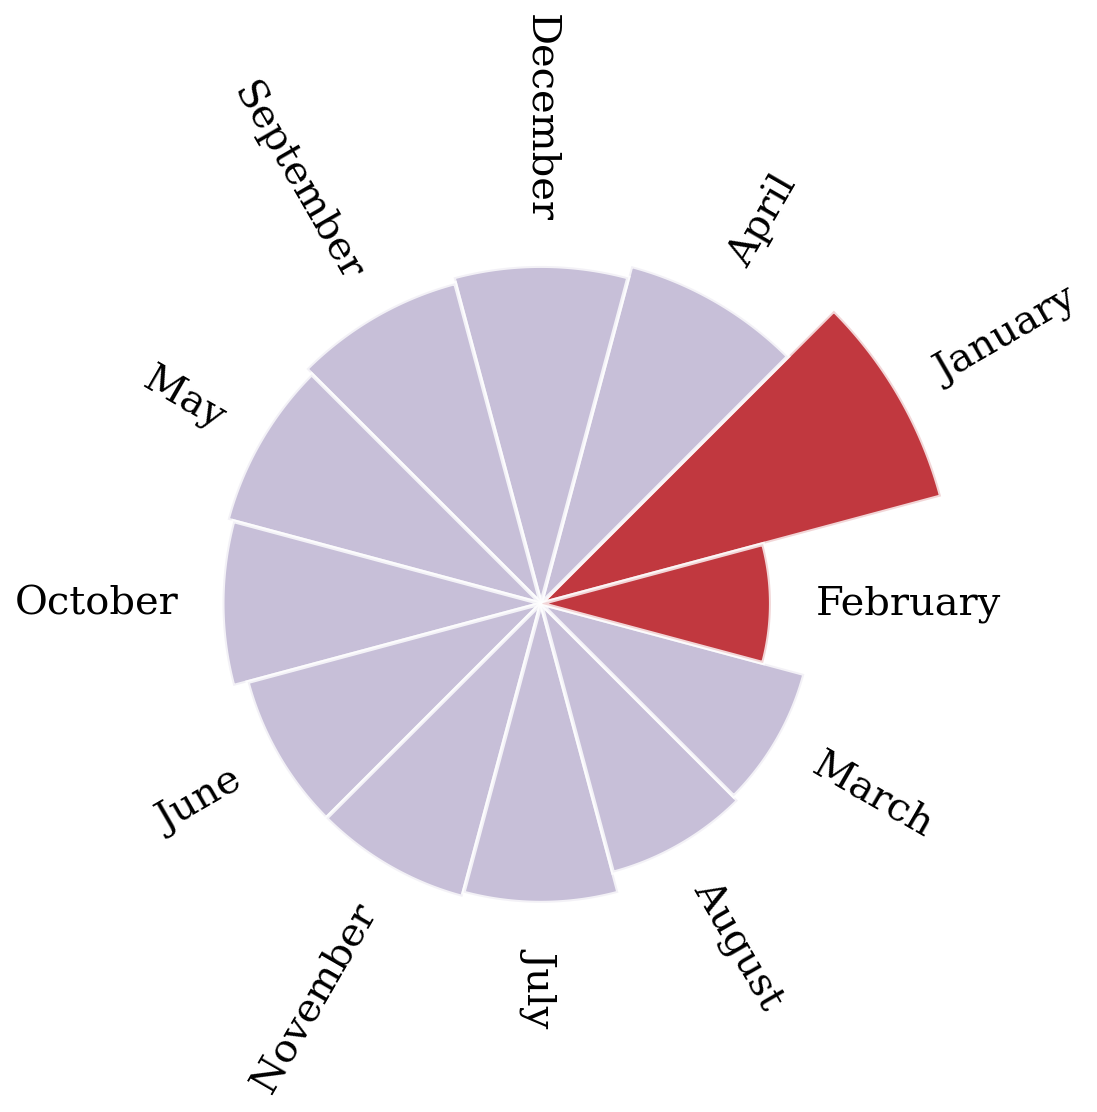

In [ ]:
df['month_added']=df['date_added'][df['year']==2020].dt.month_name() # 월 이름을 열로 추가
df['year_added'] = df['date_added'][df['year']==2020].dt.year # 년도를 추가
monthdf = df.groupby('type')['month_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T # 타입별 월별로 데이터 재구조화후 결측치 0으로 채운후 전치행렬
monthdf2 = monthdf
monthdf2['Value'] = monthdf2['Movie'] + monthdf2['TV Show'] # 두개의 항목을 더해서 전체 합을 구하기
monthdf2.reset_index(inplace=True) # 인덱스 재설정

df_m = monthdf2.sort_values(by='Value',ascending=False) # 총합이 큰 순으로 정렬
color_map = ['#b9b0cf' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710'

#초기화
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

#레이아웃조정
upperLimit = 30
lowerLimit = 1
labelPadding = 30
#최댓값
max = df_m['Value'].max()

#높이 계산
#데이터셋안의 0은 Lowerlimit(10) max는 upperlimit(100)
slope = (max - lowerLimit) / max
heights = slope * df_m.Value + lowerLimit
#너비계산 2*pi=360도
width = 2*np.pi / len(df_m.index)
#각도계산
indexes = list(range(1, len(df_m.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

for bar, angle, height, label in zip(bars,angles, heights, df_m["month_added"]):
    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    #레이블달기
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=20,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

#### 코로나 전인 2019년 장르별 상위 10개 확인하기

In [ ]:
list_2019 = df[["listed_in",'year']][df["year"]==2019] # 2019년 리스트 불러오기
top10_2019 = list_2019.value_counts().sort_values(ascending=False).head(10) # 2019년 리스트 상위 10개항목만 정렬
top10_2019.plot.barh(color= 'orange')
plt.title("Neflix contents genre_2019")
plt.show()

#### 코로나 후인 2020년 장르 상위 10개 확인하기

In [ ]:
# 2020년 장르 상위 10개 bar 시각화
list_2020 = df[["listed_in",'year']][df["year"]==2020]  # 2020년 리스트 불러오기
top10_2020 = list_2020.value_counts().sort_values(ascending=False).head(10) # 2020년 리스트 상위 10개항목만 정렬
top10_2020.plot.barh(color= 'orange')
plt.title("Neflix contents genre_2020")

plt.show()

## 한국의 데이터 분석

#### 한국의 유형별 컨텐츠 수 비교


- 가설 1 ) 한국은 tv 예능이나 드라마의 출시가 영화보다 ~~때문에 많을 것이다.

In [ ]:
plt.figure(figsize=(10, 14))

df_Korea = df[df['country'] == 'South Korea']
df_Korea_type = df_Korea['type'].value_counts()

df_notKorea = df[df['country'] != 'South Korea']
df_notKorea_type = df_notKorea['type'].value_counts()

plt.subplot(1,2,1)
plt.title('<type comparison of Korea>')
df_Korea_type.plot(kind = 'pie', explode=[0.01,0.05], autopct='%1.1f%%', colors=['#F9C1BD', '#DDDDDD'])

plt.subplot(1,2,2)
plt.title('<type comparison of non Korea>')
df_notKorea_type.plot(kind = 'pie', explode=[0.01,0.05], autopct='%1.1f%%',colors=['#F4DB9E', '#DDDDDD'])

plt.tight_layout()  # 그래프 사이 간격 자동 조정
plt.show()

#### 한국의 등록년도별 컨텐츠 수 비교

*  2019년에 왜 많았는지 추측해보기 
   -> 킹덤이 잘돼서..? 


#### 한국을 제외한 나라의 등록년도 비교

In [ ]:
df_Korea_year = df_Korea['year'].value_counts().sort_index()

x_korea = df_Korea_year.index[0:5]
y_korea = df_Korea_year.values[0:5]
korea_index = np.arange(len(x_korea))

plt.xlabel('added_year')
plt.ylabel('contents')
plt.title('<added_year comparison of Korea>')
plt.plot(y_korea, color = '#B492FF', marker = 'o')
plt.xticks(korea_index, x_korea)
plt.show()

In [ ]:
df_notKorea_year = df_notKorea['year'].value_counts().sort_index()

x_notkorea = df_notKorea_year.index[8:13]
y_notkorea = df_notKorea_year.values[8:13]
notkorea_index = np.arange(len(x_notkorea))


plt.xlabel('added_year')
plt.ylabel('contents')
plt.title('<added_year comparison of non Korea>')
plt.plot(y_notkorea, color = '#ffe666', marker = 'o')
plt.xticks(notkorea_index, x_notkorea)
plt.show()

#### 한국의 컨텐츠 출시 날짜

In [ ]:
df_Korea_relaese = df_Korea['release_year'].value_counts()
plt.xlabel('release year')
plt.ylabel('contents')
plt.title('<release_year comparison of Korea>')
df_Korea_relaese.plot(kind = 'barh', color = '#ffd571')

#### rating 으로 분류

In [ ]:
df_Korea_rating = df_Korea['rating'].value_counts()
plt.xlabel('rating')
plt.ylabel('contents')
plt.title('<rating comparison of Korea>')
df_Korea_rating.plot(kind = 'bar', color = '#F9C1BD')

In [ ]:
# 한국제외
df_notKorea_rating = df_notKorea['rating'].value_counts()

plt.xlabel('rating')
plt.ylabel('contents')
plt.title('<rating comparison of non Korea>')
df_notKorea_rating.plot(kind = 'bar', color = '#F4DB9E')

#### 한국의 listed in 비교

In [ ]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#A30DCC','#E7C2F0','#B033D2'])

def korea_genre_heatmap(df, title):
    df_Korea['splite_listed_in'] = df_Korea['listed_in'].str.replace(', ', ',').str.split(',')
    # listed_in_all = []
    # for x in df_Korea['splite_listed_in']:
    #   listed_in_all += x

    # listed_in_all = set(listed_in_all)
    test = df_Korea['splite_listed_in']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=16)

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0, square=True, linewidths=2.5)
    plt.show()


df_Korea = df[df['country'] == 'South Korea']

korea_genre_heatmap(df_Korea, 'Korea')
plt.show()

## 넷플릭스 등록 데이터 지도로 분석

- 세계지도 데이터셋 불러오기

In [ ]:
df_location = pd.read_csv(drive_path + 'world_location.csv')

- 상위 100개 나라 확인 후 데이터프레임으로 변환

In [ ]:
world_map = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

#전체 컨테츠 등록 갯수 상위 100개 나라 확인 후 데이터프레임으로 변환  
df_country_count = df['country'].value_counts()
df_country_count = df_country_count.rename_axis('name').to_frame('count') # 인덱스 재정렬

- 기존 위치 데이터프레임과 위치 데이터 프레임 병합

In [ ]:
df_location = df_location[['name','latitude','longitude']] # 이름, 위도, 경도 가져오기
df_new_location = pd.merge(df_location,df_country_count,how='outer',on='name') # 병합하기

#누락 데이터 제거 
df_new_location = df_new_location.dropna(axis=0) 

- 데이터 프레임 확인하기

In [ ]:
df_new_location.sort_values(by='count',ascending =False) # count를 기준으로 정렬
df_new_location['count'] = df_new_location['count'].astype(int) # count를 int형으로 변환
df_new_location['marker_color'] = pd.cut(df_new_location['count'],bins = 3, labels=['orange','green','violet']) # 3개의 영역으로 분할시키기

- 지도 뽑아내기

In [ ]:
# 위치 마커 표시 , popup창에 나라 이름과 컨텐츠 갯수 표시 

for name, count, lat, lng, marker_color,x in zip(df_new_location['name'].astype(str),df_new_location['count'].astype(str),df_new_location['latitude'],df_new_location['longitude'],df_new_location['marker_color'],df_new_location['count']):
    html = """<body style="background-color:yellow;"><p style="color:red;">"""+name+"""</p><p>count:"""+count+"""</p>"""
    iframe = folium.IFrame(html,width=160,height=80)
    popup = folium.Popup(iframe)
    folium.Circle(radius= x *1000,location=[lat,lng], popup=popup, color=marker_color).add_to(world_map)
      
display(world_map)